# Projet

## Import des bibliothèques

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
from io import BytesIO
warnings.filterwarnings('ignore')
sns.set()

In [40]:
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client("data")

In [41]:
def download_blob_to_df(blob_name):
    blob_client = container_client.get_blob_client(blob_name)
    download_stream = blob_client.download_blob()
    blob_data = BytesIO(download_stream.readall())
    return pd.read_csv(blob_data)

## Import des données

In [42]:
in_time_df = download_blob_to_df("in_time.csv")
manager_survey_data_df = download_blob_to_df("manager_survey_data.csv")
employee_survey_data_df = download_blob_to_df("employee_survey_data.csv")
out_time_df = download_blob_to_df("out_time.csv")
general_data_df = download_blob_to_df("general_data.csv")

## Analyse des données

In [43]:
def check_df(df, name):

    nan_values = df.isna().sum().sum()
    empty_values = df.iloc[:, :].eq('').sum(axis=1).sum()
    total_values = df.count().sum()

    print(f"Dataframe: {name} ")
    print(f"There's {nan_values} ({nan_values * 100 / total_values:.1f}%) NaN field(s) and {empty_values} ({empty_values * 100 / total_values:.1f}%) empty field(s) out of {total_values} field(s)")
    print(f"The shape of the dataset is {df.shape}\n")

In [44]:
check_df(general_data_df, "general_data_df")
general_data_df.head(2)

Dataframe: general_data_df 
There's 28 (0.0%) NaN field(s) and 0 (0.0%) empty field(s) out of 105812 field(s)
The shape of the dataset is (4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4


In [45]:
check_df(manager_survey_data_df, "manager_survey_data_df")
manager_survey_data_df.head(2)

Dataframe: manager_survey_data_df 
There's 0 (0.0%) NaN field(s) and 0 (0.0%) empty field(s) out of 13230 field(s)
The shape of the dataset is (4410, 3)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [46]:
check_df(employee_survey_data_df, "employee_survey_data_df")
employee_survey_data_df.head(2)

Dataframe: employee_survey_data_df 
There's 83 (0.5%) NaN field(s) and 0 (0.0%) empty field(s) out of 17557 field(s)
The shape of the dataset is (4410, 4)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [47]:
check_df(in_time_df, "in_time_df")
in_time_df.head(2)

Dataframe: in_time_df 
There's 109080 (10.4%) NaN field(s) and 0 (0.0%) empty field(s) out of 1046340 field(s)
The shape of the dataset is (4410, 262)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20


In [48]:
check_df(out_time_df, "out_time_df")
out_time_df.head(2)

Dataframe: out_time_df 
There's 109080 (10.4%) NaN field(s) and 0 (0.0%) empty field(s) out of 1046340 field(s)
The shape of the dataset is (4410, 262)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58


## Gestion des horraires

Une des premières remarques que nous pouvons faire suite à l'analyse de l'intégrité de nos données, c'est que nous avons beaucoup de données NaN dans les dataframe créé à partir des fichiers csv. Selon nous elle représente les abscences des employées, elle ne peuvent donc pas être simplement enlevé. De plus nous remarquons que certains jours comme le 1er janvier, tous les employées sont en marqué en NaN ce qui consolide notre hypothèse de départ.

In [49]:
in_time_df.fillna(0,inplace=True)
out_time_df.fillna(0,inplace= True)
in_time_df.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,0.0,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,0.0,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,0.0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,0.0,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,0.0,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,0.0,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,0.0,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,0.0,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,0.0,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [50]:
in_time_df.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time_df.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

for col in in_time_df.columns:
    in_time_df[col] = pd.to_datetime(in_time_df[col], errors='coerce')
    
for col in out_time_df.columns:
    out_time_df[col] = pd.to_datetime(out_time_df[col], errors='coerce')

daily_hours = (out_time_df - in_time_df).applymap(lambda x: x.total_seconds() / 3600)
daily_hours = daily_hours.fillna(0)
average_hours_per_day = daily_hours.mean(axis=1)
average_hours_df = pd.DataFrame({'EmployeeID': average_hours_per_day.index, 'AverageHours': average_hours_per_day.values})

average_hours_df.describe()

,EmployeeID,AverageHours
count,4410.000000,4410.000000
mean,2204.500000,6.951436
std,1273.201673,1.264739
min,0.000000,5.148103
25%,1102.250000,5.967834
50%,2204.500000,6.663291
75%,3306.750000,7.508761
max,4409.000000,10.394573


## Merge des données

Toujour dans le but d'analyser nos données, nous devons les merges en un seul est nique dataframe, pour ce faire nous allons faire des inner join en nous basant sur la colonne :"EmployeeID". De ce fait, nous allons nous retrouver avec un dataframe regroupant toutes les informations que nous souhaitons analyser à propos de notre employé.

In [51]:
final_df = pd.merge(general_data_df, manager_survey_data_df, on = 'EmployeeID', how = 'inner')

In [52]:
final_df = pd.merge(final_df, employee_survey_data_df, on = 'EmployeeID', how = 'inner')

In [53]:
final_df = pd.merge(final_df, average_hours_df, on = 'EmployeeID', how = 'inner')

## Traitement des données finales

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [55]:
final_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageHours
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4390.000000,4409.000000,4409.0,...,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000,4409.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.695444,15.210252,8.0,...,2.798594,7.004990,2.187571,4.122023,2.729644,3.153776,2.723996,2.728184,2.761436,6.951532
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.498840,3.659203,0.0,...,1.288222,6.122203,3.222042,3.566975,0.711223,0.360775,1.092571,1.101371,0.706245,1.264866
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.148103
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,5.967442
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.663351
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.508901
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.394573


Check des valeurs nulles

In [56]:
final_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
AverageHours                0
dtype: int64

### Traitement NumCompaniesWorked

Nous venons de nous apercevoir qu'il manque des données dans l'une de nos colonnes, or il ne s'ait pas d'une type int mais d'un type objet, nous ne pouvons donc pas ajouter la valeur median comme on le ferait en temps normal. De plus cette donnée étant importante nous ne pouvons pas nous permettre de la supprimer et non plus de supprimer la ligne de l'employé ou cette valeur est nul.
Dans ce cas bien précis, nous allons étudier la distribution des données est attribué aux données vides la valeur l plus répendue au sein de notre jeu de données.

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

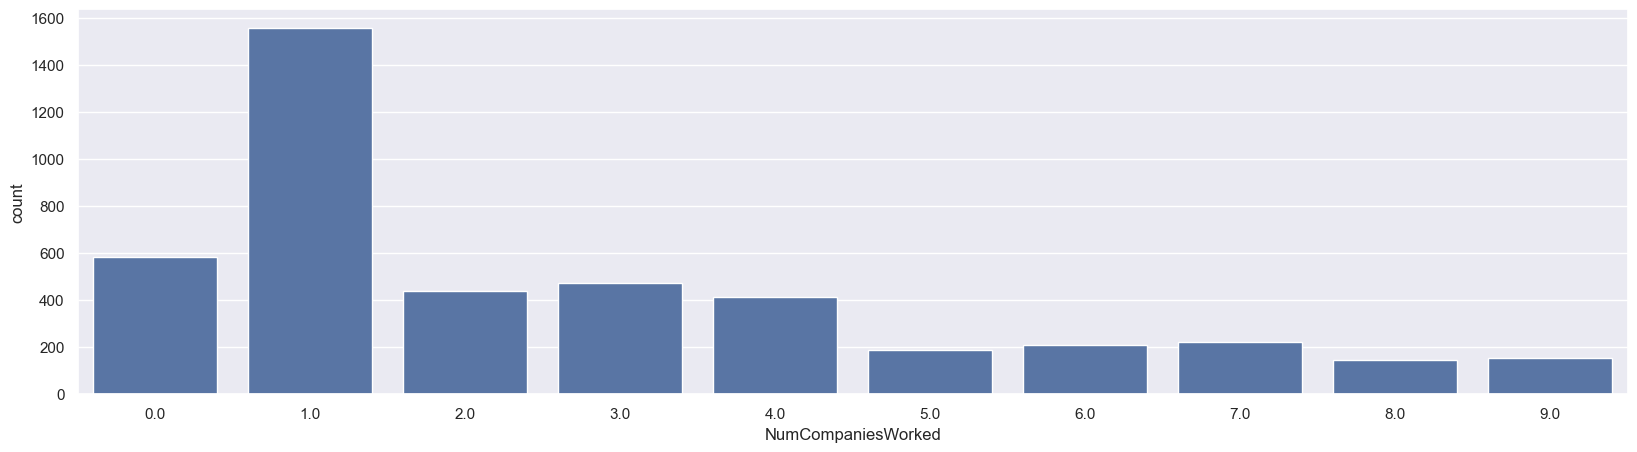

In [57]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'NumCompaniesWorked', data = final_df)

Comme nous pouvons le voir sur ce graphique, la valeur la plus répendu est 1, nous allons donc remplacer les valeurs vides par ce 1.

In [58]:
final_df['NumCompaniesWorked'].fillna(1.0, inplace = True)

### Traitement données des enquêtes

Contrairement à la colonne : "NumCompaniesWorked", ici nous avons des données numérique, dans le but de créer un jeu de données propre, nous allons remplacer les valeurs vides par la moyenne de toute la colones et ce pour toutes les valeurs manquante des trois colonnes détéctées ci-dessus : 
- EnvironmentSatisfaction
- JobSatisfaction
- WorkLifeBalance

In [59]:
environmentSatisfactionMedian = final_df.EnvironmentSatisfaction.median()
jobSatisfactionMedian = final_df.JobSatisfaction.median()
workLifeBalanceMedian = final_df.WorkLifeBalance.median()
totalWorkingYears_median = final_df['TotalWorkingYears'].median()

In [60]:
final_df['EnvironmentSatisfaction'].fillna(environmentSatisfactionMedian, inplace = True)
final_df['JobSatisfaction'].fillna(jobSatisfactionMedian, inplace = True)
final_df['WorkLifeBalance'].fillna(workLifeBalanceMedian, inplace = True)
final_df['TotalWorkingYears'].fillna(totalWorkingYears_median, inplace = True)

Regardons à nouveau comment se porte nos données : 

In [61]:
final_df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
AverageHours               0
dtype: int64

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [64]:
def save_df_to_blob(dataframe, container_name, blob_name, connection_string):
    blob_io = BytesIO()
    dataframe.to_csv(blob_io, index=False)
    blob_io.seek(0)

    blob_service_client = BlobServiceClient.from_connection_string(connection_string)

    blob_client = blob_service_client.get_container_client(container_name).get_blob_client(blob_name)

    blob_client.upload_blob(blob_io, blob_type="BlockBlob", overwrite=True)

In [65]:
save_df_to_blob(final_df, 'data', 'HumanForYou_datas', os.getenv('AZURE_STORAGE_CONNECTION_STRING'))